
# Machine Learning Assignment Notebook


Part 1: Regression and Classification  
Part 2: Unsupervised Learning  
Part 3: Reinforcement Learning (Q-Learning)


In [1]:

import pandas as pd
import numpy as np
import os
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    confusion_matrix,
    silhouette_score,
    davies_bouldin_score
)

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt


## Load Dataset

In [2]:

path = kagglehub.dataset_download("kaushil268/disease-prediction-using-machine-learning")
df = pd.read_csv(os.path.join(path, "Training.csv"))

# Clean
if "Unnamed: 133" in df.columns:
    df = df.drop(columns=["Unnamed: 133"])

df = df.dropna(axis=1, how="all")

print(df.shape)
df.head()


Using Colab cache for faster access to the 'disease-prediction-using-machine-learning' dataset.
(4920, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## Features and Targets

In [3]:

X = df.drop(columns=["prognosis"])
y_class = df["prognosis"]

# Regression target
severity_map = {d: i for i, d in enumerate(y_class.unique())}
y_reg = y_class.map(severity_map)

print("Classes:", y_class.nunique())


Classes: 41


## Train Test Split

In [4]:

X_train, X_temp, y_train_c, y_temp_c, y_train_r, y_temp_r = train_test_split(
    X, y_class, y_reg, test_size=0.3, stratify=y_class, random_state=42
)

X_val, X_test, y_val_c, y_test_c, y_val_r, y_test_r = train_test_split(
    X_temp, y_temp_c, y_temp_r, test_size=0.5, stratify=y_temp_c, random_state=42
)


## Preprocessing

In [5]:

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, numeric_cols),
    ("cat", cat_pipe, categorical_cols)
])

preprocessor.fit(X_train)

X_train_p = preprocessor.transform(X_train)
X_test_p = preprocessor.transform(X_test)


## Regression

MSE: 4.749158389156213
MAE: 1.266296883753065


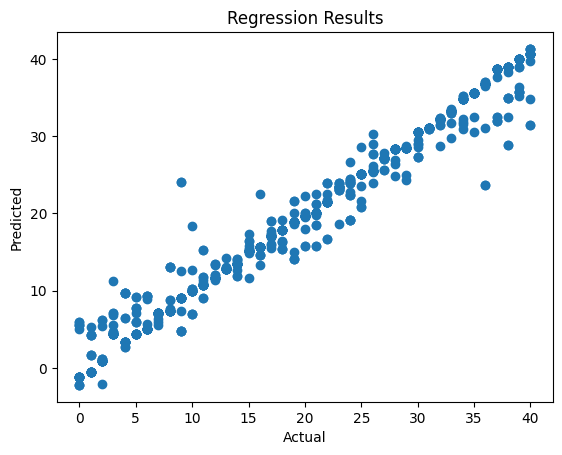

In [6]:

reg = LinearRegression()
reg.fit(X_train_p, y_train_r)

y_pred_reg = reg.predict(X_test_p)

print("MSE:", mean_squared_error(y_test_r, y_pred_reg))
print("MAE:", mean_absolute_error(y_test_r, y_pred_reg))

plt.scatter(y_test_r, y_pred_reg)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Regression Results")
plt.show()


## Classification

In [7]:

# Decision Tree
tree = DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42)
tree.fit(X_train_p, y_train_c)

y_pred_tree = tree.predict(X_test_p)

print("Decision Tree Accuracy:", accuracy_score(y_test_c, y_pred_tree))
print(classification_report(y_test_c, y_pred_tree, zero_division=0))


Decision Tree Accuracy: 0.3170731707317073
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.03      1.00      0.07        18
                                   AIDS       0.00      0.00      0.00        18
                                   Acne       0.00      0.00      0.00        18
                    Alcoholic hepatitis       0.00      0.00      0.00        18
                                Allergy       0.00      0.00      0.00        18
                              Arthritis       0.00      0.00      0.00        18
                       Bronchial Asthma       0.00      0.00      0.00        18
                   Cervical spondylosis       0.00      0.00      0.00        18
                            Chicken pox       0.00      0.00      0.00        18
                    Chronic cholestasis       0.00      0.00      0.00        18
                            Common Cold       1.00      1.00     

In [8]:

# Logistic Regression
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_p, y_train_c)

y_pred_log = logreg.predict(X_test_p)

print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_log))
print(classification_report(y_test_c, y_pred_log, zero_division=0))


Logistic Regression Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        18
                                   Acne       1.00      1.00      1.00        18
                    Alcoholic hepatitis       1.00      1.00      1.00        18
                                Allergy       1.00      1.00      1.00        18
                              Arthritis       1.00      1.00      1.00        18
                       Bronchial Asthma       1.00      1.00      1.00        18
                   Cervical spondylosis       1.00      1.00      1.00        18
                            Chicken pox       1.00      1.00      1.00        18
                    Chronic cholestasis       1.00      1.00      1.00        18
                            Common Cold       1.00      1.00      1.00    

## Clustering

KMeans Silhouette: 0.6037590553080112
KMeans DB Index: 0.45130513274263945


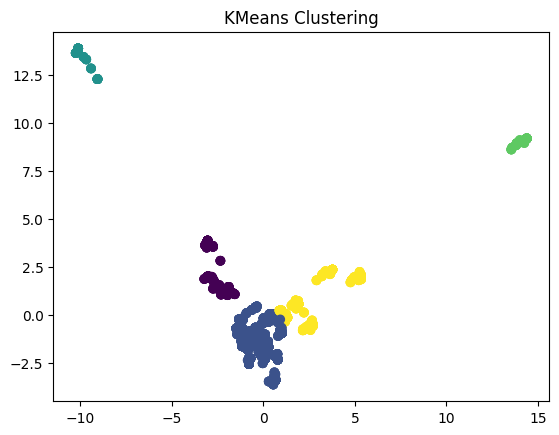

In [9]:

# Use PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_p.toarray() if hasattr(X_train_p, "toarray") else X_train_p)

# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
k_labels = kmeans.fit_predict(X_pca)

print("KMeans Silhouette:", silhouette_score(X_pca, k_labels))
print("KMeans DB Index:", davies_bouldin_score(X_pca, k_labels))

plt.scatter(X_pca[:,0], X_pca[:,1], c=k_labels)
plt.title("KMeans Clustering")
plt.show()


DBSCAN Silhouette: 0.8524462221660283


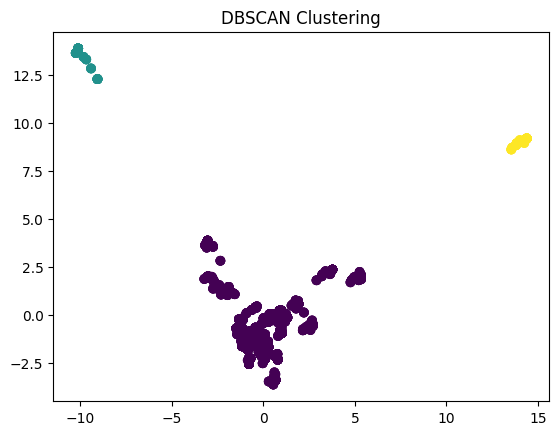

In [10]:

# DBSCAN
db = DBSCAN(eps=1.5, min_samples=5)
db_labels = db.fit_predict(X_pca)

print("DBSCAN Silhouette:", silhouette_score(X_pca, db_labels))

plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels)
plt.title("DBSCAN Clustering")
plt.show()


## Dimensionality Reduction

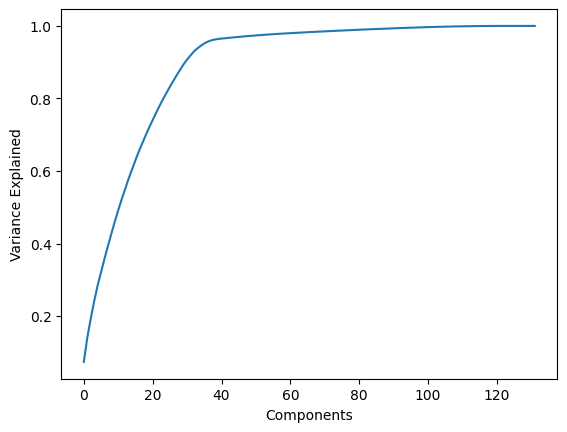

In [11]:

# PCA explained variance
pca_full = PCA()
pca_full.fit(X_train_p.toarray() if hasattr(X_train_p, "toarray") else X_train_p)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Variance Explained")
plt.show()


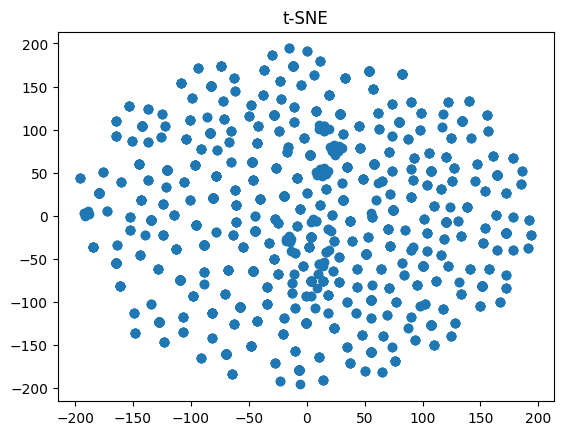

In [12]:

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_p.toarray() if hasattr(X_train_p, "toarray") else X_train_p)

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.title("t-SNE")
plt.show()


## Q-Learning (Simple Grid)

In [13]:

import random

grid_size = 5
goal = (4,4)

Q = np.zeros((grid_size, grid_size, 4))

alpha = 0.1
gamma = 0.9
epsilon = 0.2

actions = [(0,1),(0,-1),(1,0),(-1,0)]

def step(state, action):
    x,y = state
    dx,dy = actions[action]
    nx,ny = max(0,min(grid_size-1,x+dx)), max(0,min(grid_size-1,y+dy))
    reward = 1 if (nx,ny)==goal else -0.1
    return (nx,ny), reward

for episode in range(500):
    state = (0,0)
    for _ in range(50):
        if random.random() < epsilon:
            action = random.randint(0,3)
        else:
            action = np.argmax(Q[state[0],state[1]])

        next_state, reward = step(state, action)

        best_next = np.max(Q[next_state[0],next_state[1]])
        Q[state[0],state[1],action] += alpha * (reward + gamma*best_next - Q[state[0],state[1],action])

        state = next_state
        if state == goal:
            break

print("Q-Learning training done")


Q-Learning training done
